In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn import linear_model

In [28]:
crime_path ='https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'

crime_data = pd.read_csv(crime_path, skiprows=4, skipfooter=3, engine='python')

In [29]:
crime_data = crime_data.drop('Rape\n(revised\ndefinition)1', 1)


In [30]:
crime_data = crime_data.fillna(crime_data.median(), inplace = True)

In [31]:
(crime_data.isnull().sum()/len(crime_data))*100

City                                      0.0
Population                                0.0
Violent\ncrime                            0.0
Murder and\nnonnegligent\nmanslaughter    0.0
Rape\n(legacy\ndefinition)2               0.0
Robbery                                   0.0
Aggravated\nassault                       0.0
Property\ncrime                           0.0
Burglary                                  0.0
Larceny-\ntheft                           0.0
Motor\nvehicle\ntheft                     0.0
Arson3                                    0.0
dtype: float64

In [32]:
crime_data['MurderTrue'] = crime_data['Murder and\nnonnegligent\nmanslaughter'].apply(lambda x :1 if x>=1 else 0)
crime_data['Robbery'] = crime_data['Robbery'].str.replace(",","")
crime_data['Population'] = crime_data['Population'].str.replace(",","")


In [33]:
crime_data['Population']= crime_data['Population'].astype(int)
crime_data['Robbery']= crime_data['Robbery'].astype(int)
crime_data['RobberyTrue']= crime_data['Robbery'].apply(lambda x :1 if x>=1 else 0)

In [34]:
list(crime_data)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson3',
 'MurderTrue',
 'RobberyTrue']

In [35]:
crime = pd.DataFrame()
crime['City'] = crime_data['City']
crime['Population'] = crime_data['Population']
crime['Burglary'] = crime_data['Burglary'].str.replace(',', '').astype(int)
crime['Robbery'] = crime_data['Robbery'].astype(int)
crime['Larceny_theft'] = crime_data['Larceny-\ntheft'].str.replace(',', '').astype(int)
crime['Motor_vehicle_theft'] = crime_data['Motor\nvehicle\ntheft'].str.replace(',', '').astype(int)

In [36]:
crime

,City,Population,Burglary,Robbery,Larceny_theft,Motor_vehicle_theft
0,Adams Village,1861,2,0,10,0
1,Addison Town and Village,2577,3,0,20,1
2,Akron Village,2846,1,0,15,0
3,Albany,97956,705,227,3243,142
4,Albion Village,6388,53,4,165,5
5,Alfred Village,4089,10,3,36,0
6,Allegany Village,1781,0,0,10,0
7,Amherst Town,118296,204,31,1882,32
8,Amityville Village,9519,16,4,188,6
9,Amsterdam,18182,99,12,291,15


In [37]:
list(crime)

['City',
 'Population',
 'Burglary',
 'Robbery',
 'Larceny_theft',
 'Motor_vehicle_theft']

In [38]:
crime['IncidentsOfPropertyCrime'] = crime.Burglary.astype(int) + crime.Robbery + crime.Larceny_theft + crime.Motor_vehicle_theft

In [39]:
crime

,City,Population,Burglary,Robbery,Larceny_theft,Motor_vehicle_theft,IncidentsOfPropertyCrime
0,Adams Village,1861,2,0,10,0,12
1,Addison Town and Village,2577,3,0,20,1,24
2,Akron Village,2846,1,0,15,0,16
3,Albany,97956,705,227,3243,142,4317
4,Albion Village,6388,53,4,165,5,227
5,Alfred Village,4089,10,3,36,0,49
6,Allegany Village,1781,0,0,10,0,10
7,Amherst Town,118296,204,31,1882,32,2149
8,Amityville Village,9519,16,4,188,6,214
9,Amsterdam,18182,99,12,291,15,417


In [40]:
regr = linear_model.LinearRegression()
Y = crime['IncidentsOfPropertyCrime'].values.reshape(-1, 1)
X = crime[['Population', 'Burglary','Robbery','Larceny_theft']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.43169981e-04   1.18907702e+00   1.28827773e+00   9.79381814e-01]]

Intercept: 
 [-0.33846048]

R-squared:
0.999998868762


With an R-square of 0.99 it seems our model is VERY overfit.

Seems that the cause of this is one very big outlier.  Lets take care of that.

In [41]:
crime.describe()

,Population,Burglary,Robbery,Larceny_theft,Motor_vehicle_theft,IncidentsOfPropertyCrime
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,119.683908,72.902299,637.017241,35.905172,865.508621
std,4.500374e+05,924.948789,1031.032873,6346.054451,403.423826,8689.155368
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,6.000000,0.000000,31.000000,0.000000,40.500000
50%,7.233500e+03,17.500000,1.000000,94.000000,2.000000,114.500000
75%,1.842750e+04,51.250000,5.000000,287.250000,7.000000,346.500000
max,8.396126e+06,16606.000000,19170.000000,117931.000000,7434.000000,161141.000000


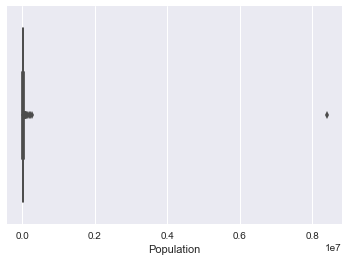

In [42]:
sns.boxplot(crime.Population)

In [43]:
crime.describe()

,Population,Burglary,Robbery,Larceny_theft,Motor_vehicle_theft,IncidentsOfPropertyCrime
count,3.480000e+02,348.000000,348.000000,348.000000,348.000000,348.000000
mean,4.003763e+04,119.683908,72.902299,637.017241,35.905172,865.508621
std,4.500374e+05,924.948789,1031.032873,6346.054451,403.423826,8689.155368
min,5.260000e+02,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,6.000000,0.000000,31.000000,0.000000,40.500000
50%,7.233500e+03,17.500000,1.000000,94.000000,2.000000,114.500000
75%,1.842750e+04,51.250000,5.000000,287.250000,7.000000,346.500000
max,8.396126e+06,16606.000000,19170.000000,117931.000000,7434.000000,161141.000000


In [44]:
regr = linear_model.LinearRegression()
Y = crime['IncidentsOfPropertyCrime'].values.reshape(-1, 1)
X = crime[['Population', 'Burglary','Robbery','Larceny_theft']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.43169981e-04   1.18907702e+00   1.28827773e+00   9.79381814e-01]]

Intercept: 
 [-0.33846048]

R-squared:
0.999998868762


In [45]:
crime = crime.drop(crime[crime.Population > 18000].index)

In [46]:
crime.describe()

,Population,Burglary,Robbery,Larceny_theft,Motor_vehicle_theft,IncidentsOfPropertyCrime
count,259.000000,259.000000,259.000000,259.000000,259.000000,259.000000
mean,5977.864865,18.671815,1.548263,95.308880,2.289575,117.818533
std,4359.599006,22.704975,2.880129,115.323732,3.683865,138.542950
min,526.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2371.500000,4.000000,0.000000,20.000000,0.000000,27.500000
50%,4625.000000,11.000000,0.000000,52.000000,1.000000,65.000000
75%,8536.500000,23.000000,2.000000,120.500000,3.000000,155.500000
max,17965.000000,138.000000,20.000000,828.000000,35.000000,969.000000


In [47]:
crime.shape

(259, 7)

In [48]:
regr = linear_model.LinearRegression()
Y = crime['IncidentsOfPropertyCrime'].values.reshape(-1, 1)
X = crime[['Population', 'Burglary','Robbery','Larceny_theft']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[  1.75195123e-04   1.03957578e+00   1.24111708e+00   1.00259221e+00]]

Intercept: 
 [-0.11704232]

R-squared:
0.999571414972


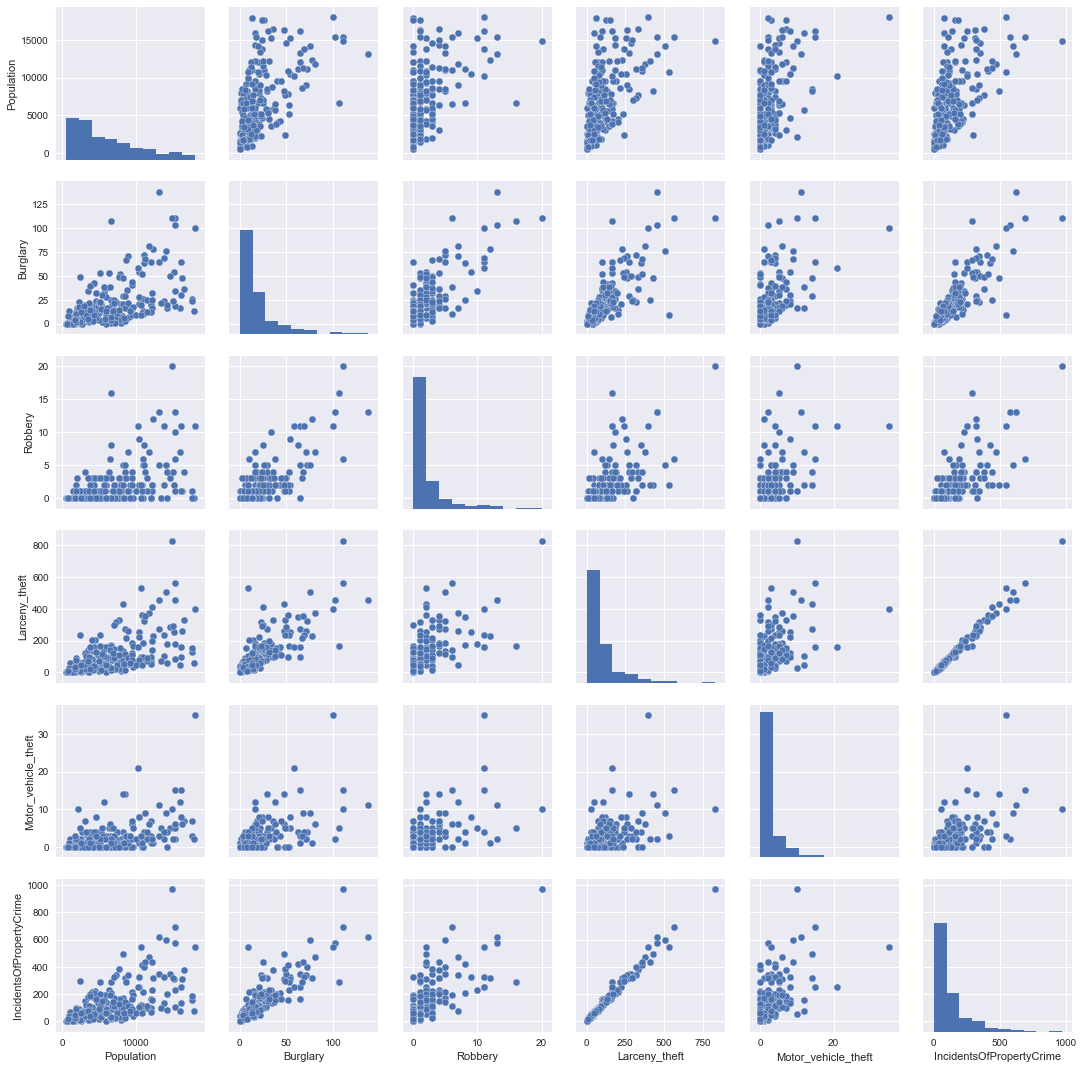

In [49]:
_ = sns.pairplot(crime)